In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
import random

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [3]:
(a_tr, b_tr), (a_te, b_te) = mnist.load_data()

a_tr = a_tr / 255
a_te = a_te / 255

b_tr_ct = keras.utils.to_categorical(b_tr, 10)
b_te_ct = keras.utils.to_categorical(b_te, 10)

Выводим выбранные случайно 50 элементов датасета

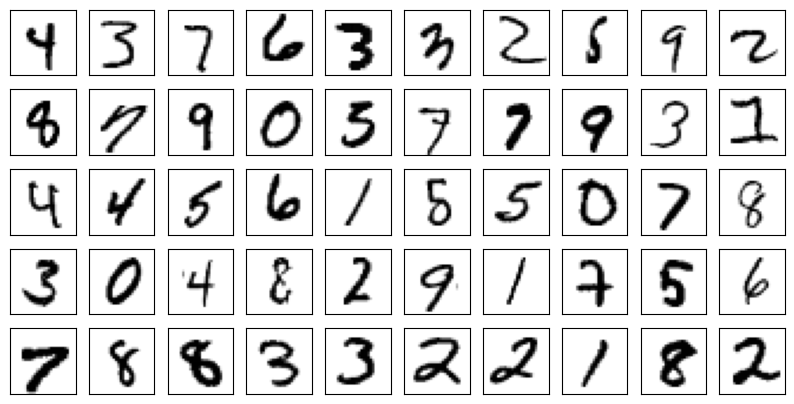

In [12]:
q = list(range(60000))
l = random.sample(q, 50)
plt.figure(figsize=(10, 5))
c = 0
for i in l:
    plt.subplot(5, 10, c+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(a_tr[i], cmap=plt.cm.binary)
    c += 1

In [13]:
numbers_model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
                   ])

print(numbers_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
numbers_model.compile(optimizer ='sgd',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 1.2242 - accuracy: 0.7300 - val_loss: 0.6709 - val_accuracy: 0.8637
Epoch 2/10
375/375 [==============================] - 2s 7ms/step - loss: 0.5802 - accuracy: 0.8657 - val_loss: 0.4656 - val_accuracy: 0.8889
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4568 - accuracy: 0.8837 - val_loss: 0.3951 - val_accuracy: 0.9007
Epoch 4/10
375/375 [==============================] - 2s 7ms/step - loss: 0.4023 - accuracy: 0.8934 - val_loss: 0.3589 - val_accuracy: 0.9051
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3702 - accuracy: 0.8996 - val_loss: 0.3353 - val_accuracy: 0.9094
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3478 - accuracy: 0.9047 - val_loss: 0.3188 - val_accuracy: 0.9127
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3307 - accuracy: 0.9091 - val_loss: 0.3050 - val_accuracy: 0.9160
Epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

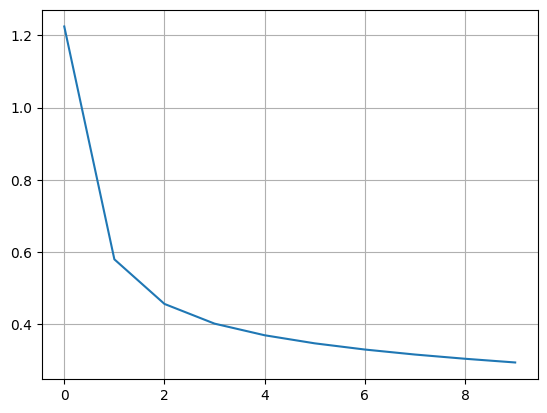

In [15]:
education = numbers_model.fit(a_tr, b_tr_ct, batch_size=128, epochs = 10, validation_split=0.2)
plt.plot(education.history['loss'])
plt.grid(1)
plt.show

In [16]:
numbers_model.evaluate(a_te, b_te_ct)

313/313 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9246


[0.2767697274684906, 0.9246000051498413]

1/1 [==============================] - 0s 26ms/step
[[2.2846221e-05 1.3505378e-05 9.9436802e-01 4.7345061e-04 1.2505690e-03
  2.7105860e-05 3.6401320e-03 5.0346362e-06 1.2433535e-04 7.4913376e-05]]
Вывод нейронной сети: 2
Индекс цифры: 3105


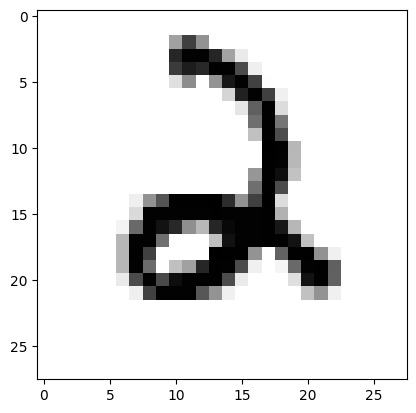

In [19]:
n = random.choice(range(0,10000))
x = np.expand_dims(a_te[n], axis=0 )
result = numbers_model.predict(x)
print( result )
print("Вывод нейронной сети:", np.argmax(result) )
print("Индекс цифры:", n)

plt.imshow(a_te[n], cmap=plt.cm.binary)
plt.show()

##### Прогоняем всю тестовую выборку по примеру блока сверху
(получаем массив с элементами из тестовой выборки и их результатами прохождения сквозь нейронную сеть)

In [20]:
allResults = numbers_model.predict(a_te)
allResults = np.argmax(allResults, axis=1)

313/313 [==============================] - 1s 3ms/step


##### 20 случайных ответов из тестовой выборки и столько же - из массива с "машинными" результатами
(демонстрируем сходность данных)

In [21]:
tmp = random.choices(range(len(allResults)), k=20)
print(allResults[tmp])
print(b_te[tmp])

[7 7 1 7 9 7 3 6 7 5 2 4 6 9 8 3 0 9 7 5]
[7 7 1 7 9 7 2 6 7 5 2 4 6 9 8 3 0 9 7 5]


#### Узнаем, сколько цифр нейронная сеть распознала неправильно

In [22]:
isEqual = allResults==b_te # вводим булевое множество isEqual, хранящее 10000 true или false значений 

# создаем массивы элементов, индексы которых совпадают с индексами расхождений ответов тестовой выборки и нейронной сети:
false_a = a_te[~isEqual] # множество правильных ответов
false_results = allResults[~isEqual] # множество неправильных ответов

print(false_a.shape)


(754, 28, 28)


#### Выводим случайные неверные результаты в количестве n-штук

Ответ нейросети:9


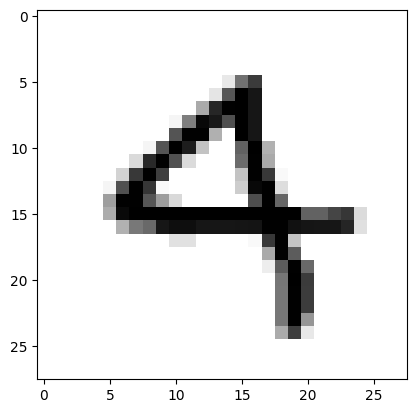

Ответ нейросети:6


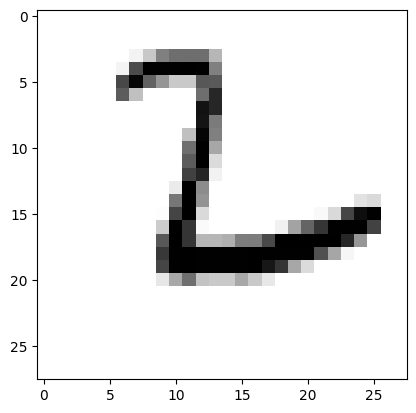

Ответ нейросети:9


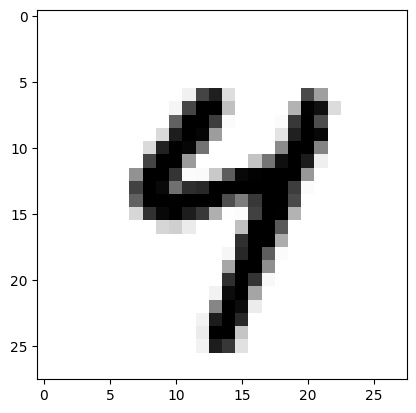

Ответ нейросети:1


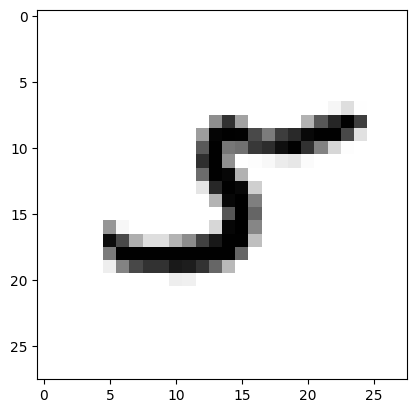

Ответ нейросети:7


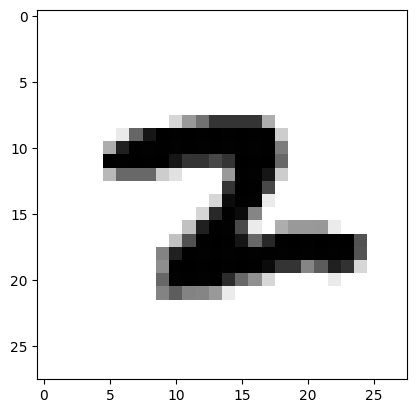

Ответ нейросети:3


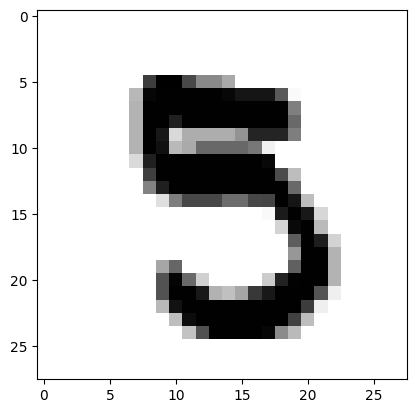

Ответ нейросети:7


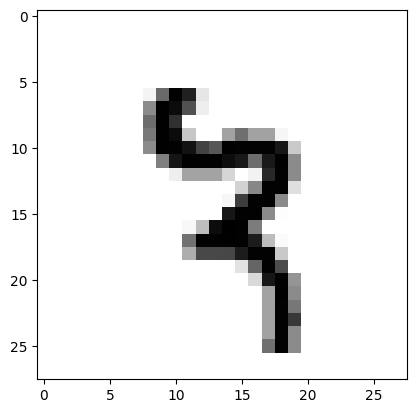

Ответ нейросети:8


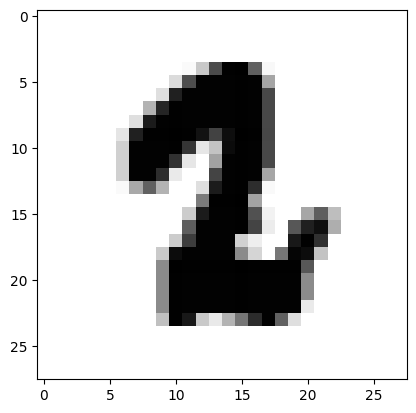

Ответ нейросети:8


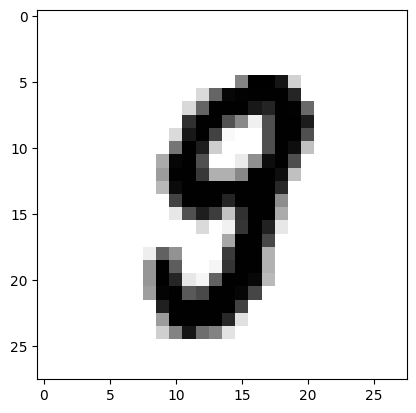

Ответ нейросети:7


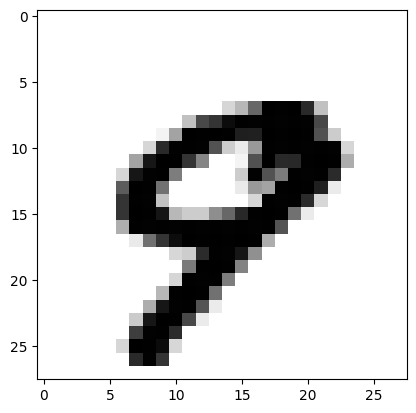

In [23]:
n = 10
tmp = random.choices(range(len(false_results)), k=n)
for i in range(n):
    print("Ответ нейросети:" +str(false_results[tmp[i]]))
    plt.imshow(false_a[tmp[i]], cmap=plt.cm.binary)
    plt.show()